# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [11]:
X = pd.get_dummies(data, columns = ['occupation', 'occupation_husb', 'religious'])

In [13]:
Y = data['affair']

In [14]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [16]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [24]:
predictions = model.predict_proba(x_test)

In [27]:
# for line in zip( predictions[:, 1], y_test ):
#     print( line )

In [26]:
model.score(x_test, y_test)

0.6769633507853403

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [30]:
def get_model_score(random):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = random)
    model.fit(x_train, y_train)
    predictions = model.predict_proba(x_test)
    return model.score(x_test, y_test)
    


In [33]:
for random in range(10):
    print(random, get_model_score(random))

0 0.6769633507853403
1 0.6821989528795811
2 0.6675392670157068
3 0.6732984293193718
4 0.6780104712041884
5 0.6890052356020943
6 0.6633507853403141
7 0.6848167539267016
8 0.6722513089005235
9 0.6863874345549739


### Оценка качества модели

Считаем accuracy последней модели

In [44]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( x_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):
    if predicted_prob >= 0.5:
        pred = 1
    else:
        pred = 0
    if actual == 1:
        if pred == 1:
            tp += 1
        else:
            fp += 1
    else:
        if pred == 0:
            tn += 1
        else:
            fn += 1
print('true positive = {}, true negative = {}, false positive = {}, false negative = {}'.format(tp, tn, fp, fn))

true positive = 27, true negative = 1264, false positive = 580, false negative = 39


In [42]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.6759162303664922

In [45]:
precision = tp / (tp + fp)
precision

0.044481054365733116

### Используем готовые библиотеки

In [46]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [49]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [50]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.3186351706036745, 1.0, 0.08937103449494822)
(0.3184445612191277, 0.9983525535420099, 0.09316855534884906)
(0.3186119873817035, 0.9983525535420099, 0.09782412748238262)
(0.31877958968963704, 0.9983525535420099, 0.10717170662823036)
(0.3192834562697576, 0.9983525535420099, 0.1282213485325535)
(0.3217900905700586, 0.9950576606260296, 0.13070683347415774)
(0.32401934443847397, 0.9934102141680395, 0.13285620542668589)
(0.3246753246753247, 0.9884678747940692, 0.13822101799369085)
(0.32695462001093495, 0.985172981878089, 0.14382032643825848)
(0.3274725274725275, 0.9818780889621087, 0.14476843944120785)
(0.327796234772979, 0.9752883031301482, 0.14655735381392698)
(0.32998885172798215, 0.9752883031301482, 0.1489227221243326)
(0.3301728945900725, 0.9752883031301482, 0.15368465670733594)
(0.33035714285714285, 0.9752883031301482, 0.15482047734393728)
(0.32997762863534674, 0.9719934102141681, 0.16065914634051887)
(0.3301622831561276, 0.9719934102141681, 0.1717710433738942)
(0.3303471444568869, 0

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


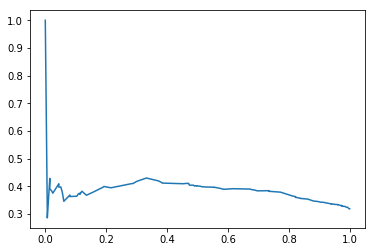

In [52]:
plt.plot( re, pr )

In [53]:
from sklearn.metrics import average_precision_score

In [55]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.384615310362239

### ROC

In [56]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [59]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [60]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.5567500518983812)
(0.006907137375287797, 0.006589785831960461, 0.5567500518983811)
(0.007674597083653108, 0.006589785831960461, 0.5454219252227593)
(0.00920951650038373, 0.014827018121911038, 0.540760320286689)
(0.010744435917114352, 0.014827018121911038, 0.5359787678222955)
(0.016116653875671526, 0.0214168039538715, 0.535278763101061)
(0.01918649270913277, 0.02471169686985173, 0.5069445390048022)
(0.029930928626247123, 0.044481054365733116, 0.5050019836567863)
(0.031465848042977744, 0.044481054365733116, 0.49673501679513093)
(0.03607060629316961, 0.051070840197693576, 0.4935543620802529)
(0.042977743668457406, 0.05601317957166392, 0.488859326334033)
(0.05372217958557176, 0.060955518945634266, 0.4883785747996848)
(0.0644666155026861, 0.08072487644151564, 0.4833501480434175)
(0.06600153491941672, 0.08072487644151564, 0.4664501266502858)
(0.0844205679201842, 0.10378912685337727, 0.4574408040301776)
(0.0851880276285495, 0.10873146622734761, 0.45507299210393154)
(0.08825786646

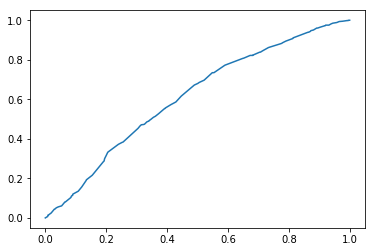

In [61]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [66]:
X = pd.get_dummies(data, columns = ['occupation', 'occupation_husb', 'religious'])

In [67]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [68]:
model2 = LogisticRegression()

In [69]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [70]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predictions2 = model2.predict_proba( X_test_short )

In [72]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

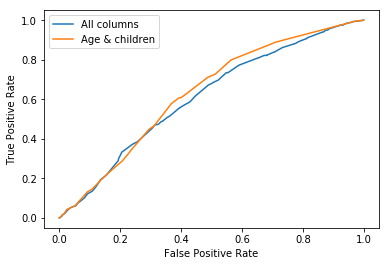

In [73]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [74]:
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_score( y_test, predictions[:, 1] )

0.6105021866912119

In [78]:
roc_auc_score( y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [79]:
from sklearn.metrics import auc

In [80]:
auc( fpr, tpr )

0.6105021866912119

In [81]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [84]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( x_train, y_train )
predictions = model1.predict_proba( x_test )

In [86]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( x_train, y_train )
predictions2 = model2.predict_proba( x_test )

In [85]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( x_train, y_train )
predictions3 = model3.predict_proba( x_test )

In [88]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

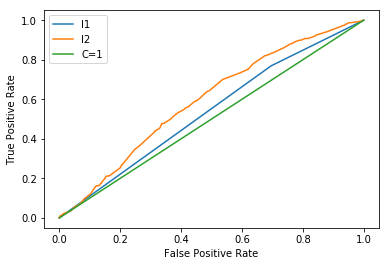

In [89]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [90]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [91]:
Y = data['affair']

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [93]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [94]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [95]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

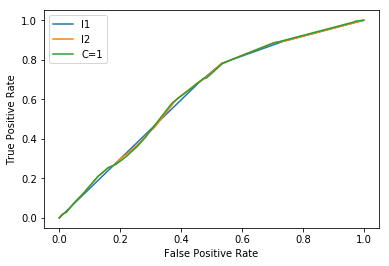

In [96]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()